In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../DATA/feature_enginerring_complete.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),transformed_price,PRICE_PER_SQFT,LAT_ROUNDED,LONG_ROUNDED
0,0,0,Owner,0,2,1300.24,"Ksfc Layout,Bangalore",77.60,12.97,55.0,-0.090412,0.04230,12.97,77.60
1,1,1,Dealer,0,2,1275.00,"Vishweshwara Nagar,Mysore",76.64,12.27,51.0,-0.193468,0.04000,12.27,76.64
2,2,2,Owner,0,2,933.16,"Jigani,Bangalore",77.63,12.78,43.0,-0.430344,0.04608,12.78,77.63
3,3,3,Owner,1,2,929.92,"Sector-1 Vaishali,Ghaziabad",77.34,28.64,62.5,0.081580,0.06721,28.64,77.34
4,4,4,Dealer,0,2,999.01,"New Town,Kolkata",88.48,22.59,60.5,0.038118,0.06056,22.59,88.48


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
## Independent and dependent feature
X = df.drop(['TARGET(PRICE_IN_LACS)', 'ADDRESS'], axis=1)
y = df['TARGET(PRICE_IN_LACS)']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
pd.DataFrame(X_train)

,Unnamed: 0.1,Unnamed: 0,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,transformed_price,PRICE_PER_SQFT,LAT_ROUNDED,LONG_ROUNDED
19214,19214,19214,Dealer,1,3,1365.12,76.82,30.66,-0.002426,0.04300,30.66,76.82
1338,1338,1338,Dealer,0,1,716.13,75.58,22.18,-1.219432,0.03491,22.18,75.58
23884,23884,23884,Dealer,0,3,1600.00,75.35,11.88,0.231451,0.04375,11.88,75.35
10054,10054,10054,Dealer,1,3,1247.97,72.96,19.18,1.505934,0.16026,19.18,72.96
16038,16038,16038,Dealer,1,1,596.90,80.17,12.84,-1.338879,0.03870,12.84,80.17
...,...,...,...,...,...,...,...,...,...,...,...,...
21575,21575,21575,Owner,0,3,1459.85,77.62,13.06,0.404907,0.05480,13.06,77.62
5390,5390,5390,Owner,1,2,1000.00,80.95,26.77,-0.723458,0.03500,26.77,80.95
860,860,860,Dealer,0,2,1381.08,73.08,19.05,1.095515,0.10137,19.05,73.08
15795,15795,15795,Owner,0,2,1275.10,77.43,28.63,-0.532413,0.03137,28.63,77.43


In [8]:
print(X_train.select_dtypes(include='object').columns)


Index(['POSTED_BY'], dtype='object')


In [9]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in train and test (very important)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_pred=model.predict(X_test_encoded)

In [12]:
y_pred

array([ 80.   ,  50.   , 450.   , ...,  51.202, 140.   , 120.   ],
      shape=(5421,))

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")


MAE: 0.11
MSE: 12.08
RMSE: 3.48
R2 Score: 0.9990


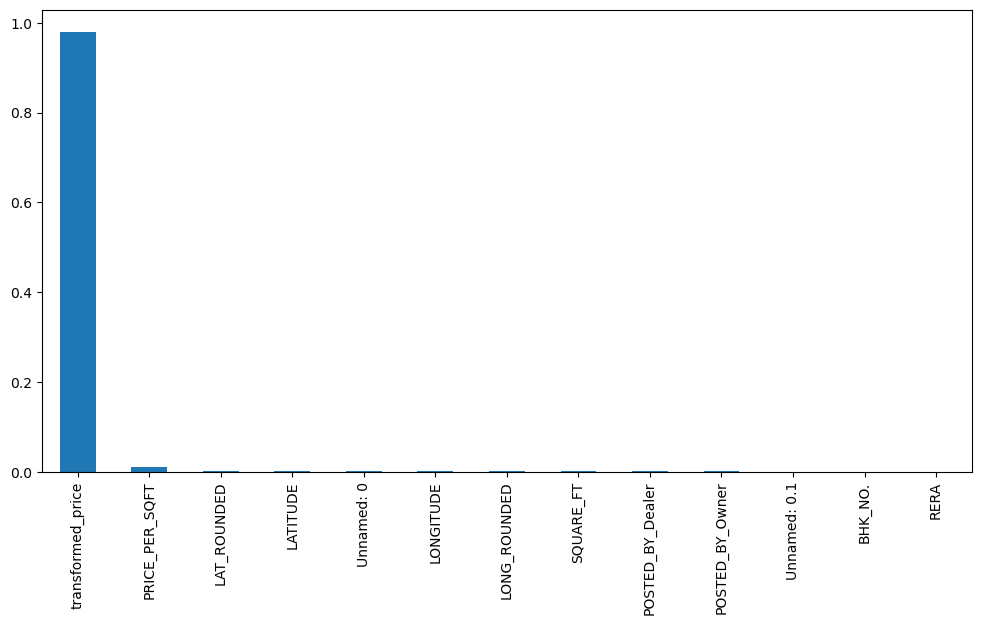

In [14]:
feature_importance = pd.Series(model.feature_importances_, index=X_train_encoded.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.show()


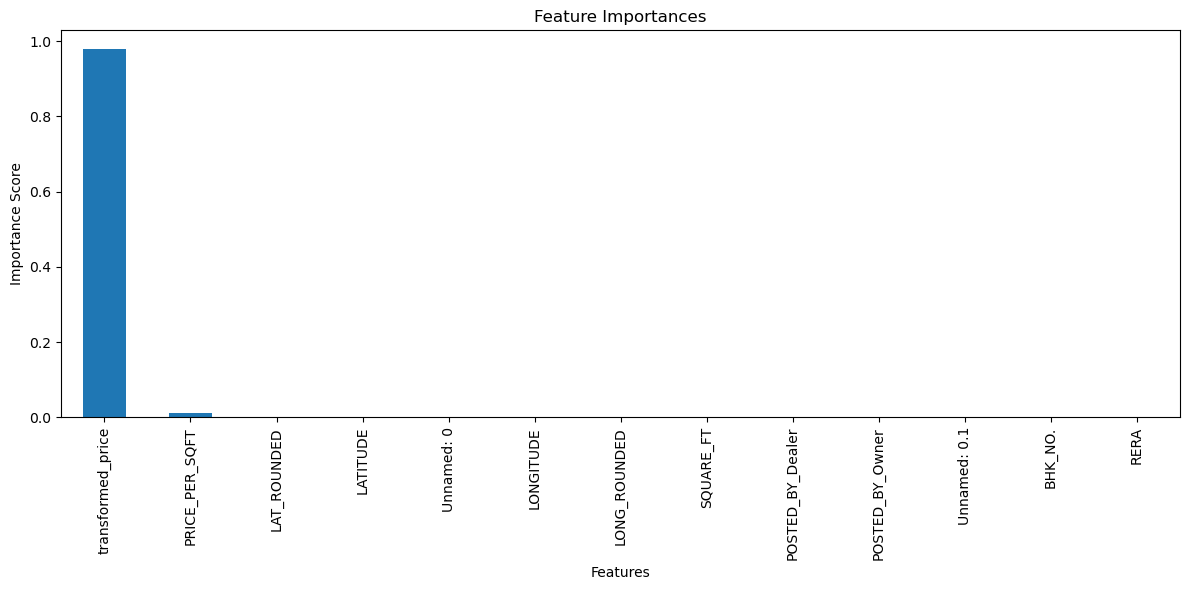

In [15]:
feature_importance = pd.Series(model.feature_importances_, index=X_train_encoded.columns)


feature_importance_sorted = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_importance_sorted.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


X shape: (27103, 11), y shape: (27103,)


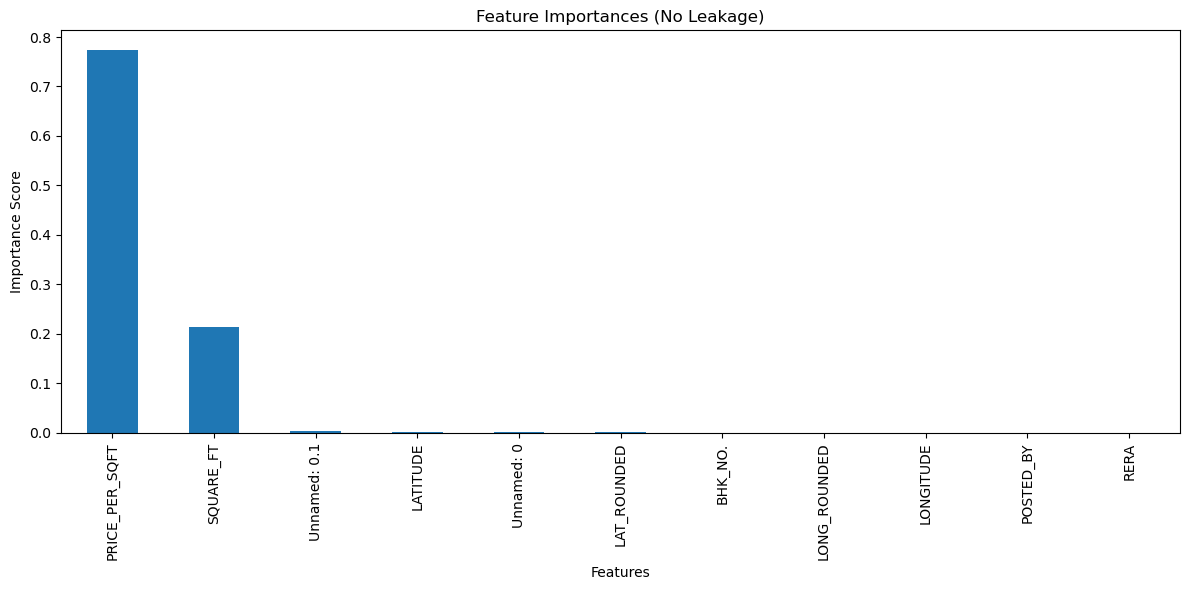

MAE: 0.91
MSE: 296.21
RMSE: 17.21
R2 Score: 0.9735


In [16]:



from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


##✅ 2. Add features
df['PRICE_PER_SQFT'] = df['TARGET(PRICE_IN_LACS)'] / df['SQUARE_FT']
df['LAT_ROUNDED'] = df['LATITUDE'].round(2)
df['LONG_ROUNDED'] = df['LONGITUDE'].round(2)

##✅ 3. Define features (X) and target (y)
X = df.drop(['TARGET(PRICE_IN_LACS)', 'ADDRESS'], axis=1)
y = df['TARGET(PRICE_IN_LACS)']

##✅ 4. Encode categorical columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

##✅ 5. Scale numeric columns
numeric_cols = ['SQUARE_FT', 'PRICE_PER_SQFT', 'LATITUDE', 'LONGITUDE']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

##✅ 6. Remove any leaky column like 'transformed_price'
if 'transformed_price' in X.columns:
    X = X.drop('transformed_price', axis=1)

##✅ 7. Confirm X and y shapes
print(f"X shape: {X.shape}, y shape: {y.shape}")

##✅ 8. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##✅ 9. Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

##✅ 10. Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances (No Leakage)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

##✅ 11. Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")


In [17]:
import sys
!{sys.executable} -m pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [18]:
import sys
!{sys.executable} -m pip install RandomForestRegressor

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement RandomForestRegressor (from versions: none)
ERROR: No matching distribution found for RandomForestRegressor


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
    
   
        
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
        
    
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")
        


Random Forest:
MAE: 2.49
MSE: 810.23
RMSE: 28.46
R2 Score: 0.9275
Linear Regression:
MAE: 2.49
MSE: 810.23
RMSE: 28.46
R2 Score: 0.9275
Gradient Boosting:
MAE: 2.49
MSE: 810.23
RMSE: 28.46
R2 Score: 0.9275
XGBoost:
MAE: 2.49
MSE: 810.23
RMSE: 28.46
R2 Score: 0.9275


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best R² Score:", grid.best_score_)


Best Params: {'max_depth': 20, 'n_estimators': 100}
Best R² Score: 0.9524985749297552


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=2)
grid.fit(X_train, y_train)

print("Best Params:", grid.bestparams)
print("Best R² Score:", grid.bestscore)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=  20.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=  15.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=  17.8s


In [ ]:
import pickle
pickle.dump(Model,open('../DATA/house_price_model.pkl','wb'))
